<a href="https://colab.research.google.com/github/claudio-bon/nlp-movies-classification/blob/main/movies_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
In this assignement you will see a little example about
*   How to download a dataset
*   How to load it into dataframes
*   How to use extract basic features from the corpus
*   How to train a classifier on those features

You are advised to look at the code and understand it.

You will be then asked to perform feature extraction and classification yourself.

The task that will be addressed is document classification, specifically tasks related to sentiment classification.


# Document Classification Tutorial

## Preliminary Steps
These are some preliminary steps before addressing the task.
Import some basic libraries and set a variable that will be used in multiple steps.

In [ ]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation

In [ ]:
dataset_name = "aclImdb"

CHANGED: If it is necessary, clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

IMPORTANT: DO NOT RUN THIS SECTION UNLESS YOU NEED IT.


In [ ]:
'''
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")
'''

'\nfolder = os.getcwd()\n\nprint("Current work directory: " + str(folder))\n\ndataset_folder = os.path.join(os.getcwd(), "Datasets")\n\nfor filename in os.listdir(dataset_folder):\n    file_path = os.path.join(dataset_folder, filename)\n    try:\n        if os.path.isfile(file_path) or os.path.islink(file_path):\n            os.unlink(file_path)\n        elif os.path.isdir(file_path):\n            shutil.rmtree(file_path)\n    except Exception as e:\n        print(\'Failed to delete %s. Reason: %s\' % (file_path, e))\n\nprint("Cleaned")\n'

## Dataset Download
Dowload the Imdb movie reviews dataset


In [ ]:
import urllib.request  #  download files
import tarfile  #  unzip files

dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = tarfile.open(dataset_path)
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful extraction


Look at the files you have downloaded to understand the structure of the dataset.

## Create the dataframe
Now the dataset is loaded into a dataframe to be more accessible.
During the creation some data will be printed as an example.

In [ ]:
dataset_name = "aclImdb"

debug = True

dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, split, sentiment)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path):
                    # open the file
                    with open(file_path, mode='r', encoding='utf-8') as text_file:
                        # read it and extract informations
                        text = text_file.read()
                        score = filename.split("_")[1].split(".")[0]
                        file_id = filename.split("_")[0]

                        num_sentiment = -1

                        if sentiment == "pos" : num_sentiment = 1
                        elif sentiment == "neg" : num_sentiment = 0

                        # create single dataframe row
                        dataframe_row = {
                            "file_id": file_id,
                            "score": score,
                            "sentiment": num_sentiment,
                            "split": split,
                            "text": text
                        }

                        # print detailed info for the first file
                        if debug:
                            print(file_path)
                            print(filename)
                            print(file_id)
                            print(text)
                            print(score)
                            print(sentiment)
                            print(split)
                            print(dataframe_row)
                            debug = False
                        dataframe_rows.append(dataframe_row)

            except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)

# transform the list of rows in a proper dataframe
dataframe = pd.DataFrame(dataframe_rows)
dataframe = dataframe[["file_id",
                       "score",
                       "sentiment",
                       "split",
                       "text"]]
dataframe_path = os.path.join(folder, dataset_name + ".pkl")
dataframe.to_pickle(dataframe_path)

/content/Datasets/Original/aclImdb/train/pos/5323_7.txt
5323_7.txt
5323
There are a number of things that are not correct, although this is not too important since what happened to whom and when is still in dispute. The most blatant liberty with the facts I think is when they start to play at Bruno Koschmidder's Kaiserkeller, when in fact they played at the Indra and moved to the Kaiserkeller later.<br /><br />I agree with Semprinni20 that the film was biased in favour of Pete Best's version, but if he is the story consultant then I guess he calls the shots. I also agree with Semprinni that the recordings Pete Best plays on say the last word on the subject of why he was fired.<br /><br />Although the film is not such a lavish production as the later film "Backbeat", I prefer this film because it is more accurate, and because it has a better script with deeper characterisation.<br /><br />There is plenty in the film that is quite substantial - such as Brian Epstein trying to hide the fa

Little analysis of the dataframe

In [ ]:
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

print("Dataframe structure:")
print(df)
print()


print("Total rows %d" % (len(df)))
print()

column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())
print()


for split in ["train", "test"]:
    df1 = df.loc[df['split'] == split]
    column = 'score'
    print("Distribution of scores in %s: " % (split))
    print(df1[column].value_counts())
    print()

Dataframe structure:
      file_id score  ...  split                                               text
0        5323     7  ...  train  There are a number of things that are not corr...
1        7628     8  ...  train  This movie is one of those "WOW!" movies. Not ...
2        4352    10  ...  train  I was looking through the movie listings in my...
3        9525     8  ...  train  ROAD TO PERDITION can be summed up by Thomas N...
4        4223     8  ...  train  The movie has a great written genre story. It ...
...       ...   ...  ...    ...                                                ...
49995    6577     1  ...   test  What is it with studios like Paramount that ha...
49996     483     2  ...   test  "Dolemite" is the touching story of Dolemite (...
49997    5862     1  ...   test  This is possibly the single worst film i have ...
49998   10228     1  ...   test  HOW MANY MOVIES ARE THERE GOING TO BE IN WHICH...
49999   12355     3  ...   test  Gotta add a comment to this one!!

A little game: let's create a word cloud for the two sentiments and see if there is something interesting.

Negative:


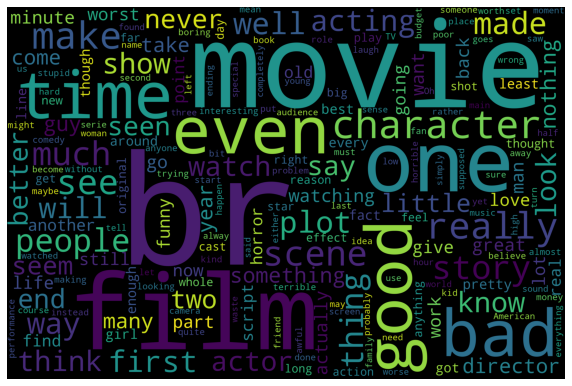

Positive:


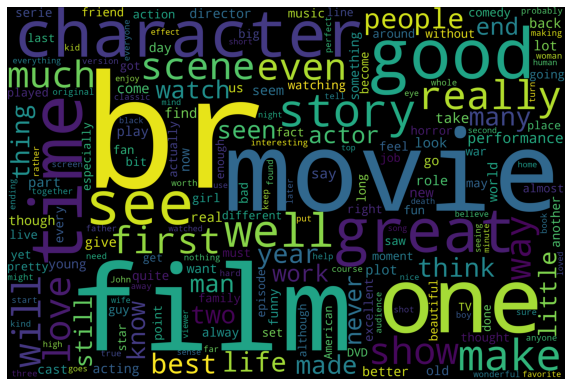

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

positive_corpus = df.loc[df['sentiment'] == 1]
positive_corpus = positive_corpus["text"].tolist()

negative_corpus = df.loc[df['sentiment'] == 0]
negative_corpus = negative_corpus["text"].tolist()

print("Negative:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(negative_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Positive:")
wordcloud2 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(positive_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2) 
plt.axis("off");
plt.show()

Is there something weird about these words? You can repeat the process multiple times to test your observations.
Is there something that will influence our approach? Think about it...

## Features extraction
Let's tackle the Sentiment Analysis task.

The scikit-learn library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the BoW representation (as tf-idf) of a corpus.

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['sentiment'].tolist())

Processing corpus

Shape of the matrix: (data points, features)
(25000, 74849)



Fitting on a corpus, the vectorizer creates an internal vocabulary that will be used to create the BoW representation.
The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

Do not try to print the whole vocabulary: it is quite large ;)

In [ ]:
print(len(vectorizer.vocabulary_))

74849


Since the vocabulary will be quite big, by default X will be a *sparse* matrix (see scipy.sparse for more info).

In [ ]:
print(X_train)

  (0, 72259)	0.037450355428399834
  (0, 73702)	0.04533945856331851
  (0, 72557)	0.028644017186505357
  (0, 56275)	0.07080151374444997
  (0, 56155)	0.06179611182526213
  (0, 11130)	0.06353834840541232
  (0, 27312)	0.0424170943080097
  (0, 23615)	0.10465453584136697
  (0, 68148)	0.05343556617638685
  (0, 32936)	0.11782943832674654
  (0, 5436)	0.03708176391766288
  (0, 62817)	0.0674116349902618
  (0, 61380)	0.022888681796363563
  (0, 10357)	0.02545842821279257
  (0, 29075)	0.08958008558495807
  (0, 6166)	0.09937383354179569
  (0, 31095)	0.04820225676717415
  (0, 8611)	0.06618267190217056
  (0, 35787)	0.02425445973274696
  (0, 64740)	0.13060357644194065
  (0, 63747)	0.09116066685778466
  (0, 4965)	0.09295991122065
  (0, 3167)	0.02235640154045453
  (0, 72757)	0.03458502361892899
  (0, 6172)	0.13588427874151193
  :	:
  (24999, 43838)	0.05394858979756879
  (24999, 34683)	0.04479488038662848
  (24999, 4465)	0.05780807515939459
  (24999, 46916)	0.039223667388549356
  (24999, 2821)	0.03151419934

All the scipy tools are compatible with sparse matrices, but if you somehow need the traditional representation it is possible to convert it with the following command. Keep in mind that if the vocabulary and/or the dataset are large, the resulting array will be quite large, possibly occupying all the RAM.


```
X.toarray()
```



It is then possible to parse the test split likewise. Remember to use the transform function and not the fit_transform when working on the test set.

In [ ]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['sentiment'].tolist())

## Training and Testing
It is now possible to choose one of the many models available in the sci-kit learn library, train it and test it.

In [ ]:
# training and testing
from sklearn.svm import LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

In [ ]:
# print results
from sklearn.metrics import classification_report

report_train = classification_report(Y_train, Y_pred_train, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Train
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Test
              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



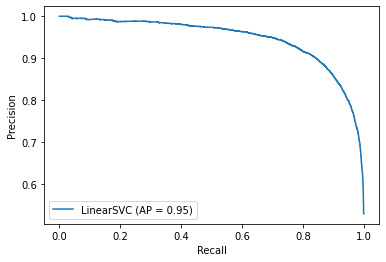

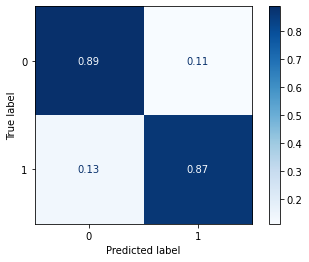

In [ ]:
# more advanced tools
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

# Now...do it yourself!

Now, rather then sentiment classification, try to address the task of score prediction on the same dataset: based on the text of the reviews, try to predict the score assigned by the reviewer.

## First part
As first part, experiment with the options of the vectorizer to improve the classification using logistic regression. You are required to look at the documentation of the functions.
You can also use or add other pre-processing step to the text if you feel like it, you are not obliged to use TfidfVectorizer.

Obviously, you will need to use the variable names declared in the first block.


Some notes:
* In the multi-class classification, the most important measures are F1s (especially macro and micro), since it is a complex measure given that considers more aspects than the simple accuracy.
* Between the problem as regression and the problem as multi-class classification, the priority is the problem as regression. Indeed, the classification perspective does penalize each error in the same way, while the regression perspective considers the difference between the predicted value and the real value (prediction 8 for real value 2 is way worse than prediction 3 for value 2). The classification perspective is a tool to understand the problem better and experiment. 
* There are no threshold values that you have to reach with the measurements to obtain a certain score. The score will be assigned considering the results of the class and the efforts we will see in the solution.
* In each code section, you have to deliver a single approach, but if you have observations or interesting alternative approaches, you can mention them in the .txt file

**Some instructions**<br>
For the execution of the following blocks it is implied that the Dataset it is already downloaded by the execution of the 4th block (under the section "Dataset Download") and saved through the execution of the 5th block (under the section "Create the dataframe").

In [ ]:
# write your code here

import os
import pandas as pd
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.pipeline import Pipeline

# Loading the Dataset
print('Loading the dataset')
dataset_name = "aclImdb"
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)
print('Done\n')

# Creation of the feature extractor
print('Creation of the feature extractor')
feature_extractor =  TfidfVectorizer()
print('Done\n')

# Preparation of the training set
print('Preparation of the training set')
df_train = df.loc[df['split'] == "train"]
train_corpus = df_train['text'].tolist()
X_train = feature_extractor.fit_transform(train_corpus)
Y_train = df_train['score'].to_numpy(dtype='int32')
print('Done\n')

# Preparation of the test set
print('Preparation of the test set')
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = feature_extractor.transform(test_corpus)
Y_test = df_test['score'].to_numpy(dtype='int32')
print('Done\n')

Loading the dataset
Done

Creation of the feature extractor
Done

Preparation of the training set
Done

Preparation of the test set
Done



Now run the code below to train your classifier:

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train, Y_train)

Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)

####################################################################

Now test your results running the code below:

R2 score 0.484339
MAE 1.468520
MSE 6.283800

              precision    recall  f1-score   support

           1       0.53      0.84      0.65      5022
           2       0.21      0.05      0.08      2302
           3       0.27      0.12      0.17      2541
           4       0.32      0.34      0.33      2635
           7       0.32      0.24      0.27      2307
           8       0.27      0.25      0.26      2850
           9       0.23      0.04      0.07      2344
          10       0.48      0.77      0.59      4999

    accuracy                           0.43     25000
   macro avg       0.33      0.33      0.30     25000
weighted avg       0.37      0.43      0.37     25000

[[4201  125  142  236   33   52    6  227]
 [1415  120  202  327   45   36    8  149]
 [1028  143  303  638  115   93   12  209]
 [ 715  110  278  891  221  181   20  219]
 [ 128   24   72  291  552  566   57  617]
 [ 141   11   47  173  430  699   80 1269]
 [ 113    8   28  102  155  470   89 1379]
 [ 

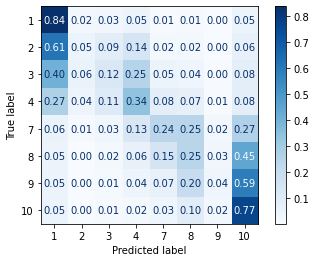

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

####################################################################

## Second part
Now experiment both with the processing (the vectorizer) and the classifier to obtain the best result.

**Some instructions**<br>
For the execution of the following blocks it is implied that the Dataset it is already downloaded by the execution of the 4th block (under the section "Dataset Download") and saved through the execution of the 5th block (under the section "Create the dataframe").

In [ ]:
# write your code here

import warnings
warnings.filterwarnings('ignore')

import os
import math
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# Loading the Dataset
print('Loading the dataset')
dataset_name = "aclImdb"
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)
print('Done\n')

# Split training and test set
print('Split training and test set')
df_train = df.loc[df['split'] == "train"]
df_test = df.loc[df['split'] == "test"]
print('Done\n')

# Classes balancing (Dowsampling)
print('Classes balancing')
min_inst = df_train.score.value_counts()[-1]
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = pd.concat([df_train[df_train.score == i].sample(n=min_inst, random_state=42) for i in df_train.score.unique()])
print('Done\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Loading the dataset
Done

Split training and test set
Done

Classes balancing
Done



The following block perform an hyperparameter tuning in order to experiment and select the best feature extractor and classifier.<br>
Since the execution of this block requires some time it has been made available the possibility to skip its execution altogether and directly execute the successive block where the best feature extractor and classifier, at least between the ones experimented, are presented.

In [ ]:
# write your code here

class HyperparameterTuner():
    def __init__(self):
        # Feature extractor hyperparameters tuning
        self.feature_extraction_id = 'feature extractor'

        class LemmaTokenizer():
            def __init__(self, stemming=False, stop_words=False):
                self.stemming = stemming
                self.stop_words = stop_words
                
                if self.stemming:
                    self.stemmer = PorterStemmer()
                else:
                    self.wnl = WordNetLemmatizer()
            def __call__(self, doc):
                doc = word_tokenize(doc)
                #Stop words removal
                if self.stop_words:
                    doc = [word for word in doc if not word in set(stopwords.words('english'))]
                #Stemming
                if self.stemming:
                    doc = [self.stemmer.stem(word) for word in doc]
                #Lemmization
                else:
                    doc = [self.wnl.lemmatize(word) for word in doc]
                return doc
            def __repr__(self):
                return 'LemmaTokenizer(stemming={}, stop_words={})'.format(self.stemming, self.stop_words)

        class Preprocessor():
            def __init__(self, digits=False, br=False):
                self.digits = digits
                self.br = br
            def __call__(self, doc):
                if self.digits:
                    doc = ''.join([c for c in doc if not c.isdigit()])
                if self.br:
                    doc = re.sub('<br\s/>',' ',doc)
                return doc.lower()
            def __repr__(self):
                return 'Preprocessor(digits={}, br={})'.format(self.digits, self.br)


        tuned_param_tfidf = [{'fe__min_df': [5],
                              'fe__ngram_range': [(1,2)],
                              #'fe__tokenizer': [LemmaTokenizer(), LemmaTokenizer(stemming=True),LemmaTokenizer(stop_words=True),LemmaTokenizer(stemming=True,stop_words=True)],
                              'fe__tokenizer': [LemmaTokenizer()],
                              #'fe__preprocessor': [None,Preprocessor(),Preprocessor(digits=True), Preprocessor(br=True), Preprocessor(digits=True,br=True)],
                              'fe__preprocessor': [Preprocessor(br=True)],
                              'fe__sublinear_tf': [True],
                              'cl__C': [0.1],
                              'cl__random_state': [42],
                              'cl__max_iter': [500],
                        },
        ]

        self.feature_extractors = {
            'tfidf': {'name': 'TF-IDF',
                      'estimator': Pipeline([('fe', TfidfVectorizer()),
                                             ('cl', LinearSVC())]),
                      'param': tuned_param_tfidf,
            },
        }

        # Classifiers hyperparametes tuning
        self.classification_id = 'classificator'

        tuned_param_lr = [{'solver': ['newton-cg','saga'],
                           'C': [1, 10, 100],
                           'max_iter': [1000],
                           }
        ]
        tuned_param_sgd = [{'learning_rate':['adaptive'],
                            'early_stopping': [True],
                            'n_iter_no_change': [5,10,30],
                            'eta0':[0.01,0.1,1],
                            'class_weight': [None,'balanced'],
                            'average': [True],
                            'random_state': [42],
                            'max_iter': [1000]},
        ]
        tuned_param_svc = [{'C': [0.1, 1],
                            'dual': [True],
                            'random_state': [42],
                            'class_weight': [None, 'balanced'],
                            'max_iter': [1000]},
                           {'C': [0.1, 1],
                            'dual': [False],
                            'class_weight': [None, 'balanced'],
                            'max_iter': [1000]},
        ]

        self.classifiers = {
            'lr': {'name': 'Logistic Regression                  ',
                   'estimator': LogisticRegression(),
                   'param': tuned_param_lr, 
                },
            'sgd': {'name': 'Linear Classifier SGD               ',
                    'estimator': SGDClassifier(),
                    'param': tuned_param_sgd
                },
            'svc': {'name': 'Linear Support Vector Classification',
                   'estimator': LinearSVC(),
                   'param': tuned_param_svc,
                },
        }

    def print_results(self, model):
        print("Best parameters set found on train set:\n")
        print(model.best_params_)
        print('With a score of: {}\n'.format(model.best_score_))
        print("Grid scores:\n")
        means = model.cv_results_['mean_test_score']
        stds = model.cv_results_['std_test_score']
        params = model.cv_results_['params']
        for mean, std, params_tuple in zip(means, stds, params):
            print("%0.3f (+/-%0.03f) for %r"
                % (mean, std * 2, params_tuple))
        print()


    def gridsearch(self, X, Y, search_grid, opt_type, scoring='recall_macro'):
        print('='*40)
        print('Beginning the hyperparameters optimization for {}\n'.format(opt_type))
        best_scores = {}
        best_estimators = {}
        best_params = {}

        for id, v in search_grid.items():
            print('-'*40)
            print("Trying {} {}".format(opt_type, v['name']))
            clf = GridSearchCV(v['estimator'], v['param'],
                               scoring = scoring,
                               return_train_score = False,
                            )
            
            clf.fit(X, Y.ravel())

            self.print_results(clf)
            best_scores[id] = clf.best_score_
            best_estimators[id] = clf.best_estimator_
            best_params[id] = clf.best_params_

        print("Summary of results")
        for id in best_scores.keys():
            print("{}\t - score: {:4.2}%\t - params: {}".format(search_grid[id]['name'], best_scores[id], best_params[id]))

        key_best = max(best_scores, key=lambda key: best_scores[key])

        print('\nThe best {} is {}'.format(opt_type, search_grid[key_best]['name']))
        print('With parameters: {}'.format(best_params[key_best]))
        print('And score: {}\n'.format(best_scores[key_best]))

        estimator = best_estimators[key_best]
        if (opt_type == self.feature_extraction_id):
            estimator = dict(estimator.steps)['fe']

        return estimator


    def tune(self, dfx, dfy, feature_extractor=None, classifier=None, df_size=0.1):
        _, dfx_small, _, dfy_small = train_test_split(dfx, dfy, test_size=df_size,
                                                      shuffle=True, random_state=42)
        if feature_extractor is None:
            self.feature_extractor = self.gridsearch(dfx_small, dfy_small, self.feature_extractors, self.feature_extraction_id)
        else:
            self.feature_extractor = feature_extractor

        X_small = self.feature_extractor.fit_transform(dfx_small.tolist())
        Y_small = dfy_small.to_numpy(dtype='int32')

        if classifier is None:
            self.classifier = self.gridsearch(X_small, Y_small, self.classifiers, self.classification_id)
        else:
            self.classifier = classifier

        return self.feature_extractor, self.classifier




# Hyperparameters optimization of the feature extractor and classifier
print('Hyperparameters tuning')
hyperpt = HyperparameterTuner()
feature_extractor, classifier = hyperpt.tune(dfx=df_train['text'], dfy=df_train['score'])
print('Done\n')

Hyperparameters tuning
Beginning the hyperparameters optimization for feature extractor

----------------------------------------
Trying feature extractor TF-IDF
Best parameters set found on train set:

{'cl__C': 0.1, 'cl__max_iter': 500, 'cl__random_state': 42, 'fe__min_df': 5, 'fe__ngram_range': (1, 2), 'fe__preprocessor': Preprocessor(digits=False, br=True), 'fe__sublinear_tf': True, 'fe__tokenizer': LemmaTokenizer(stemming=False, stop_words=False)}
With a score of: 0.31618758153750204

Grid scores:

0.316 (+/-0.028) for {'cl__C': 0.1, 'cl__max_iter': 500, 'cl__random_state': 42, 'fe__min_df': 5, 'fe__ngram_range': (1, 2), 'fe__preprocessor': Preprocessor(digits=False, br=True), 'fe__sublinear_tf': True, 'fe__tokenizer': LemmaTokenizer(stemming=False, stop_words=False)}

Summary of results
TF-IDF	 - score: 0.32%	 - params: {'cl__C': 0.1, 'cl__max_iter': 500, 'cl__random_state': 42, 'fe__min_df': 5, 'fe__ngram_range': (1, 2), 'fe__preprocessor': Preprocessor(digits=False, br=True), '

In the next block there are the best feature extractor and classifier found.

In [ ]:
# write your code here

class LemmaTokenizer():
    def __init__(self, stemming=False, stop_words=False):
        self.stemming = stemming
        self.stop_words = stop_words
                
        if self.stemming:
            self.stemmer = PorterStemmer()
        else:
            self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        doc = word_tokenize(doc)
        #Stop words removal
        if self.stop_words:
            doc = [word for word in doc if not word in set(stopwords.words('english'))]
        #Stemming
        if self.stemming:
            doc = [self.stemmer.stem(word) for word in doc]
        #Lemmization
        else:
            doc = [self.wnl.lemmatize(word) for word in doc]
        return doc
    def __repr__(self):
        return 'LemmaTokenizer(stemming={}, stop_words={})'.format(self.stemming, self.stop_words)

class Preprocessor():
    def __init__(self, digits=False, br=False):
        self.digits = digits
        self.br = br
    def __call__(self, doc):
        if self.digits:
            doc = ''.join([c for c in doc if not c.isdigit()])
        if self.br:
            doc = re.sub('<br\s/>',' ',doc)
        return doc.lower()
    def __repr__(self):
        return 'Preprocessor(digits={}, br={})'.format(self.digits, self.br)


feature_extractor = TfidfVectorizer(min_df=5, ngram_range=(1,2), preprocessor=Preprocessor(digits=False, br=True), tokenizer=LemmaTokenizer(), sublinear_tf=True)

classifier = LinearSVC(C=0.1, random_state=42)

Next is the preparation of the training set and test set with the selected feature extractor

In [ ]:
# write your code here

# Preparation of the training set
print('Preparation of the training set')
train_corpus = df_train['text'].tolist()
X_train = feature_extractor.fit_transform(train_corpus)
Y_train = df_train['score'].to_numpy(dtype='int32')
print('Done\n')

# Preparation of the test set
print('Preparation of the test set')
test_corpus = df_test['text'].tolist()
X_test = feature_extractor.transform(test_corpus)
Y_test = df_test['score'].to_numpy(dtype='int32')
print('Done\n')

Preparation of the training set
Done

Preparation of the test set
Done



Run the code below to train your classifier, then test it with the block that follows.

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)
####################################################################

R2 score 0.581937
MAE 1.288880
MSE 5.094480

              precision    recall  f1-score   support

           1       0.62      0.70      0.66      5022
           2       0.27      0.25      0.26      2302
           3       0.32      0.25      0.28      2541
           4       0.39      0.38      0.38      2635
           7       0.35      0.42      0.38      2307
           8       0.32      0.24      0.27      2850
           9       0.25      0.26      0.26      2344
          10       0.58      0.61      0.59      4999

    accuracy                           0.44     25000
   macro avg       0.39      0.39      0.39     25000
weighted avg       0.43      0.44      0.43     25000

[[3506  639  326  252   61   37   53  148]
 [ 879  582  344  293   59   24   31   90]
 [ 574  418  646  545  166   56   42   94]
 [ 335  292  432  993  309  109   69   96]
 [  58   65   99  205  959  390  244  287]
 [  73   42   85  135  638  685  532  660]
 [  70   32   50   72  285  385  607  843]
 [ 

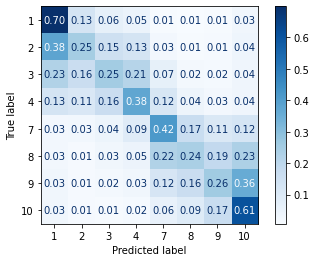

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")
####################################################################

Credits:
Andrea Galassi,
Federico Ruggeri,
Paolo Torroni
(Oct 2020)